<a href="https://colab.research.google.com/github/tejashreereddyy/FMML-Project-and-Labs/blob/main/AIML_III_Module_4_Lab_3_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Students Internship Batch of 2024

Module 4: Perceptron and Gradient Descent

Lab 3: Gradient Descent

Things to try out:

Change batch size in mini-batch gradient descent.

Test all the three out on real datasets.

Compare the effects of changing learning rate by the same amount in Batch GD, SGD and Mini-batch GD.

1. Change Batch Size in Mini-Batch Gradient Descent:

You can try different batch sizes and observe how it affects convergence in mini-batch gradient descent. Here's an implementation comparing different batch sizes:

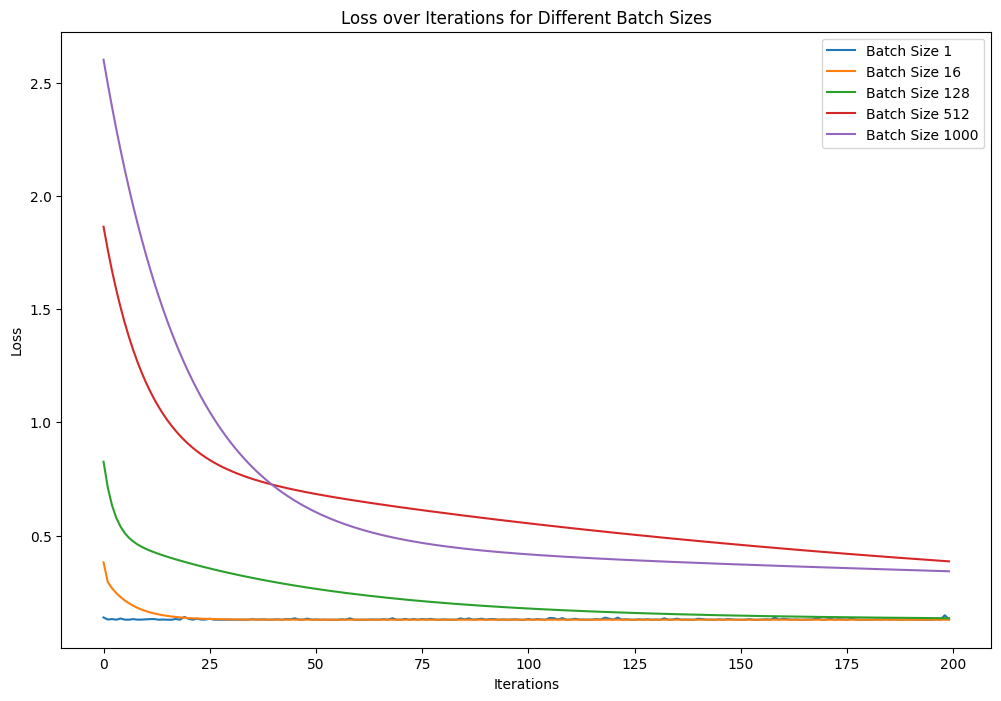

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Sample dataset
X = np.random.rand(1000, 1)  # 1000 random samples
y = 4 * X + np.random.randn(1000, 1) * 0.5  # Linear function with noise

# Gradient Descent function (Mini-batch)
def mini_batch_gradient_descent(X, y, theta, learning_rate, iterations, batch_size):
    m = len(y)
    loss_history = []

    for _ in range(iterations):
        indices = np.random.permutation(m)  # Shuffle dataset
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]
            predictions = X_batch.dot(theta)
            errors = predictions - y_batch
            gradients = (2 / batch_size) * X_batch.T.dot(errors)
            theta -= learning_rate * gradients

        loss = (1 / (2 * m)) * np.sum((X.dot(theta) - y) ** 2)
        loss_history.append(loss)

    return theta, loss_history

# Set up parameters
learning_rate = 0.01
iterations = 200
theta = np.random.randn(2, 1)

# Add bias term to X
X_b = np.c_[np.ones((1000, 1)), X]

# Testing different batch sizes
batch_sizes = [1, 16, 128, 512, 1000]  # Stochastic, small batches, full batch
plt.figure(figsize=(12, 8))

for batch_size in batch_sizes:
    theta = np.random.randn(2, 1)  # Reset theta
    theta, loss_history = mini_batch_gradient_descent(X_b, y, theta, learning_rate, iterations, batch_size)
    plt.plot(loss_history, label=f'Batch Size {batch_size}')

plt.title('Loss over Iterations for Different Batch Sizes')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()


2. Compare Batch Gradient Descent, Mini-Batch, and Stochastic Gradient Descent:

This code compares Batch GD, Stochastic GD, and Mini-Batch GD by adjusting the batch size:

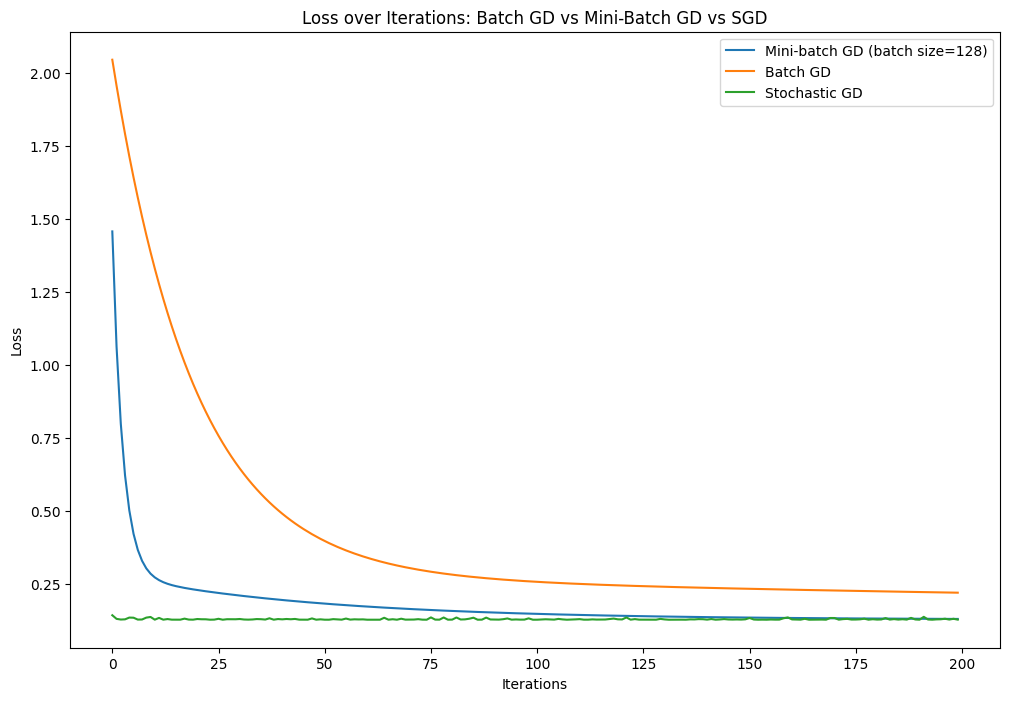

In [2]:
# Full batch gradient descent
def batch_gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    loss_history = []

    for _ in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradients = (2 / m) * X.T.dot(errors)
        theta -= learning_rate * gradients
        loss = (1 / (2 * m)) * np.sum(errors ** 2)
        loss_history.append(loss)

    return theta, loss_history

# Stochastic gradient descent (batch_size=1)
def stochastic_gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    loss_history = []

    for _ in range(iterations):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X[random_index:random_index + 1]
            yi = y[random_index:random_index + 1]
            predictions = xi.dot(theta)
            errors = predictions - yi
            gradients = (2) * xi.T.dot(errors)
            theta -= learning_rate * gradients

        loss = (1 / (2 * m)) * np.sum((X.dot(theta) - y) ** 2)
        loss_history.append(loss)

    return theta, loss_history

# Initialize parameters
learning_rate = 0.01
iterations = 200
theta = np.random.randn(2, 1)
theta_stochastic = theta.copy()
theta_batch = theta.copy()

# Mini-batch gradient descent with batch size 128
theta_mini, loss_history_mini = mini_batch_gradient_descent(X_b, y, theta.copy(), learning_rate, iterations, batch_size=128)

# Full batch gradient descent
theta_batch, loss_history_batch = batch_gradient_descent(X_b, y, theta_batch, learning_rate, iterations)

# Stochastic gradient descent
theta_stochastic, loss_history_sgd = stochastic_gradient_descent(X_b, y, theta_stochastic, learning_rate, iterations)

# Plot comparison
plt.figure(figsize=(12, 8))
plt.plot(loss_history_mini, label="Mini-batch GD (batch size=128)")
plt.plot(loss_history_batch, label="Batch GD")
plt.plot(loss_history_sgd, label="Stochastic GD")
plt.title("Loss over Iterations: Batch GD vs Mini-Batch GD vs SGD")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()


3. Critical Thinking Question
Question:

Which of the following is TRUE, given the optimal learning rate?

(i) Batch gradient descent is always guaranteed to converge to the global optimum of a loss function.

(ii) Stochastic gradient descent is always guaranteed to converge to the global optimum of a loss function.

(iii) For convex loss functions (i.e. with a bowl shape), batch gradient descent is guaranteed to eventually converge to the global optimum, while stochastic gradient descent is not.

(iv) For convex loss functions (i.e. with a bowl shape), stochastic gradient descent is guaranteed to eventually converge to the global optimum, while batch gradient descent is not.

(v) For convex loss functions (i.e. with a bowl shape), both stochastic gradient descent and batch gradient descent will eventually converge to the global optimum.

(vi) For convex loss functions (i.e. with a bowl shape), neither stochastic gradient descent nor batch gradient descent are guaranteed to converge to the global optimum.

Answer:

(iii) is TRUE: For convex loss functions, batch gradient descent is guaranteed to eventually converge to the global optimum, while stochastic gradient descent may not. Batch GD always moves towards the global minimum with precise steps due to the full dataset used in each step. In contrast, stochastic GD introduces noise due to random sampling, which can lead to convergence to a point near the global minimum but not always precisely on it.

(v) is partially true, but SGD might oscillate around the global minimum rather than perfectly converging to it.